In [4]:
import pandas as pd #데이터분석라이브러리
import numpy as np # 수치계산 라이브러리
import seaborn as sns #시각화
import matplotlib.pyplot as plt #seaborn 고급화 해서 쓰기 위해서 

In [7]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [8]:
#폰트가 선명하게 보이기 위해 레티나를 설정
#주변이 흐릿하게 보이는 것을 방지
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\user\AppData\Local\Temp\ipykernel_16452\169946400.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


##### 가설1. 음주 여부에 따라 건강검진 수치 차이가 있을까?
##### 가설2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

In [9]:
df=pd.read_csv("C:/Users/user/Desktop/PythonStudy/RawDataSet/건강검진.csv",encoding='cp949',low_memory=False)

In [10]:
#데이터 갯수 확인하기 - 100만건, 34개변수
df.shape

(1000000, 34)

In [11]:
#데이터 미리보기
df.head() #처음 5개
df.tail() #뒤에 5개
df.sample() #아무거나 랜덤으로 1개 가져옴

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [13]:
#data의 기본정보 확인하기 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [14]:
#변수명(컬럼)만 확인하고 싶을때
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [16]:
#변수별 data type확인하기
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

In [18]:
#결측치 확인하기 : isnull()-> 결측값이 있으면 true, 없으면 false 
#isnull().sum() 변수별 결측값 총 갯수
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<AxesSubplot: >

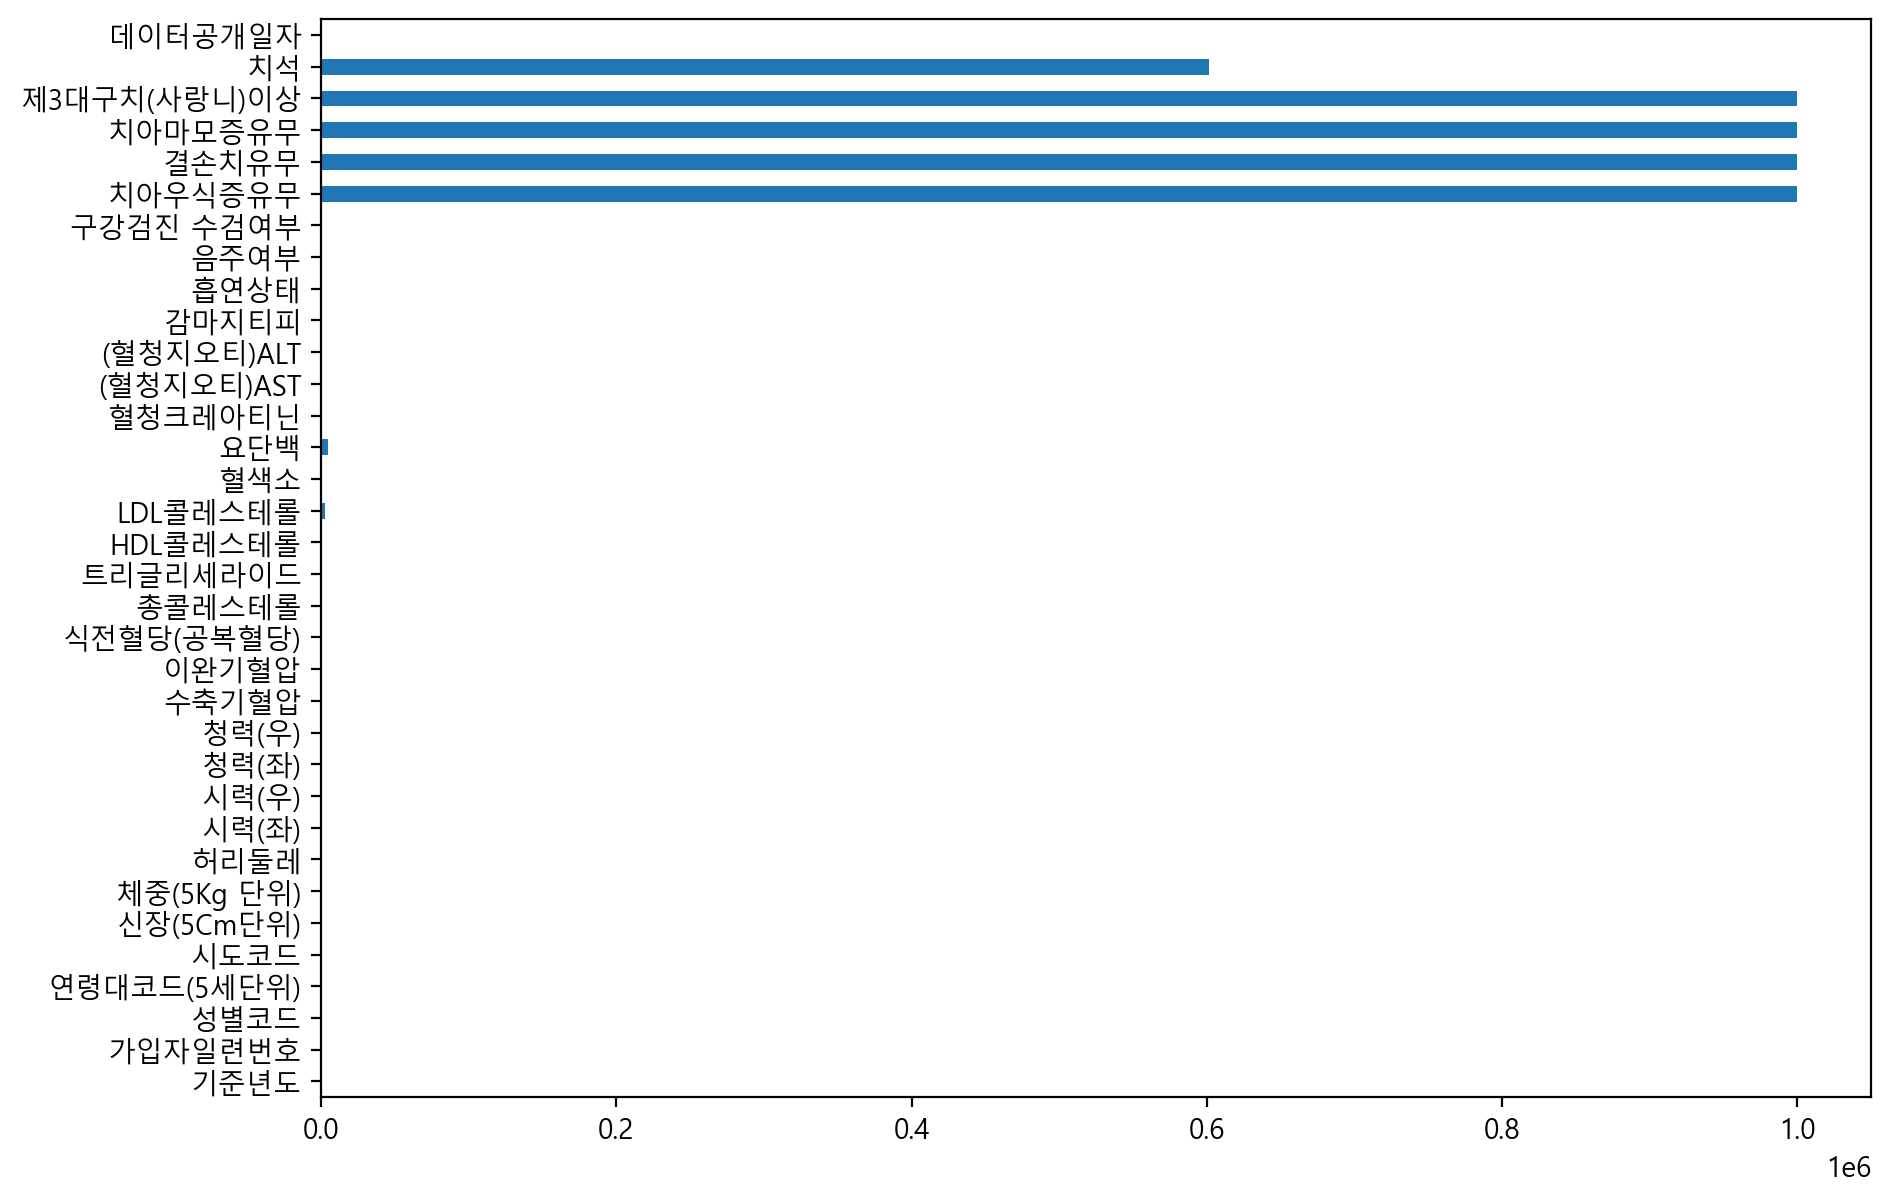

In [26]:
#isna():isnull과 같다.
df.isna().sum().plot.barh(figsize=(10,7))

In [ ]:
#pandas에서 하나 컬럼만 가져오면 serise형태로 출력
#2개 이상의 변수를 추출하려면 리스트 형식으로 감싸줘야하고, df형태로 출력됨

In [29]:
#(혈청지오티)ALT,(혈청지오티)AST 데이터 가져오기
df[["(혈청지오티)ALT","(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0


In [30]:
#(혈청지오티)ALT,(혈청지오티)AST 데이터 요약하기
df[["(혈청지오티)ALT","(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [31]:
#수치데이터에 대한 요약 확인->describe()
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


In [32]:
#성별 그룹화해서 갯수 집계하기.
df['성별코드'].value_counts()

1    531172
2    468828
Name: 성별코드, dtype: int64

In [34]:
#흡연상태로 그룹화해서 갯수 집계하기.
df['흡연상태'].value_counts()

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

#### Groupby / Pivot_table 사용하기

In [36]:
#group.by 함수 사용하면 그룹별로 항목의 data 갯수 파악 
df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [38]:
#성별코드&음주여부로 그룹화하고 갯수 세어보자
df.groupby(['성별코드','음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [39]:
#성별코드&음주여부로 그룹화하고 감마지티피의 평균을 구합니다.
df.groupby(['성별코드','음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [42]:
#성별코드&음주여부로 그룹화하고 감마지티피의 요약수치를 구합니다.
#요약수치를 구하려면 describe() 사용! 
df.groupby(['성별코드','음주여부'])['감마지티피'].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [44]:
#agg를 사용하면 필요한 산술통계만 뽑아서 볼 수 있다.
df.groupby(['성별코드','음주여부'])['감마지티피'].agg
    (['count','mean','median'])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

#### pivot과 pivot_table 차이
- PIVOT : 연산을 하지 않고 data의 형태만 바꾸고자 할 때 사용.
- PIVOT_TABLE : 연산을 하고자 할 때 사용.
- group by는 serise형태로 결과값 출력, pivot_table은 dataframe 형태로 출력
- pivot이 groupby보다 속도는 느리지만 직관적으로 사용가능

In [47]:
#음주여부에 따른 그룹화 된 수를 피봇테이블로 구하기
df.pivot_table(index="음주여부", values='가입자일련번호',aggfunc='count')

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [49]:
#음주여부에 따른 감마지티피의 평균을 구해보자
#aggfunc의 기본값은 mean, 여러값을 보려면 리스트[]형태로 넣어줌.
pd.pivot_table(df,index='음주여부',values='감마지티피',
               aggfunc=['mean','median'])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.858541,19.0
1.0,47.745678,30.0


In [50]:
pd.pivot_table(df,index='음주여부',values='감마지티피',
               aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,502698.0,999.0,26.858541,1.0,30.687404
1.0,19.0,30.0,53.0,496732.0,999.0,47.745678,1.0,63.103844


In [51]:
pd.pivot_table(df,index=['성별코드','음주여부'],values='감마지티피',
               aggfunc='describe')

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0   24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0   13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0   13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

### 시각화하기(히스토그램,막대그래프, 산점도,상관계수 등)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


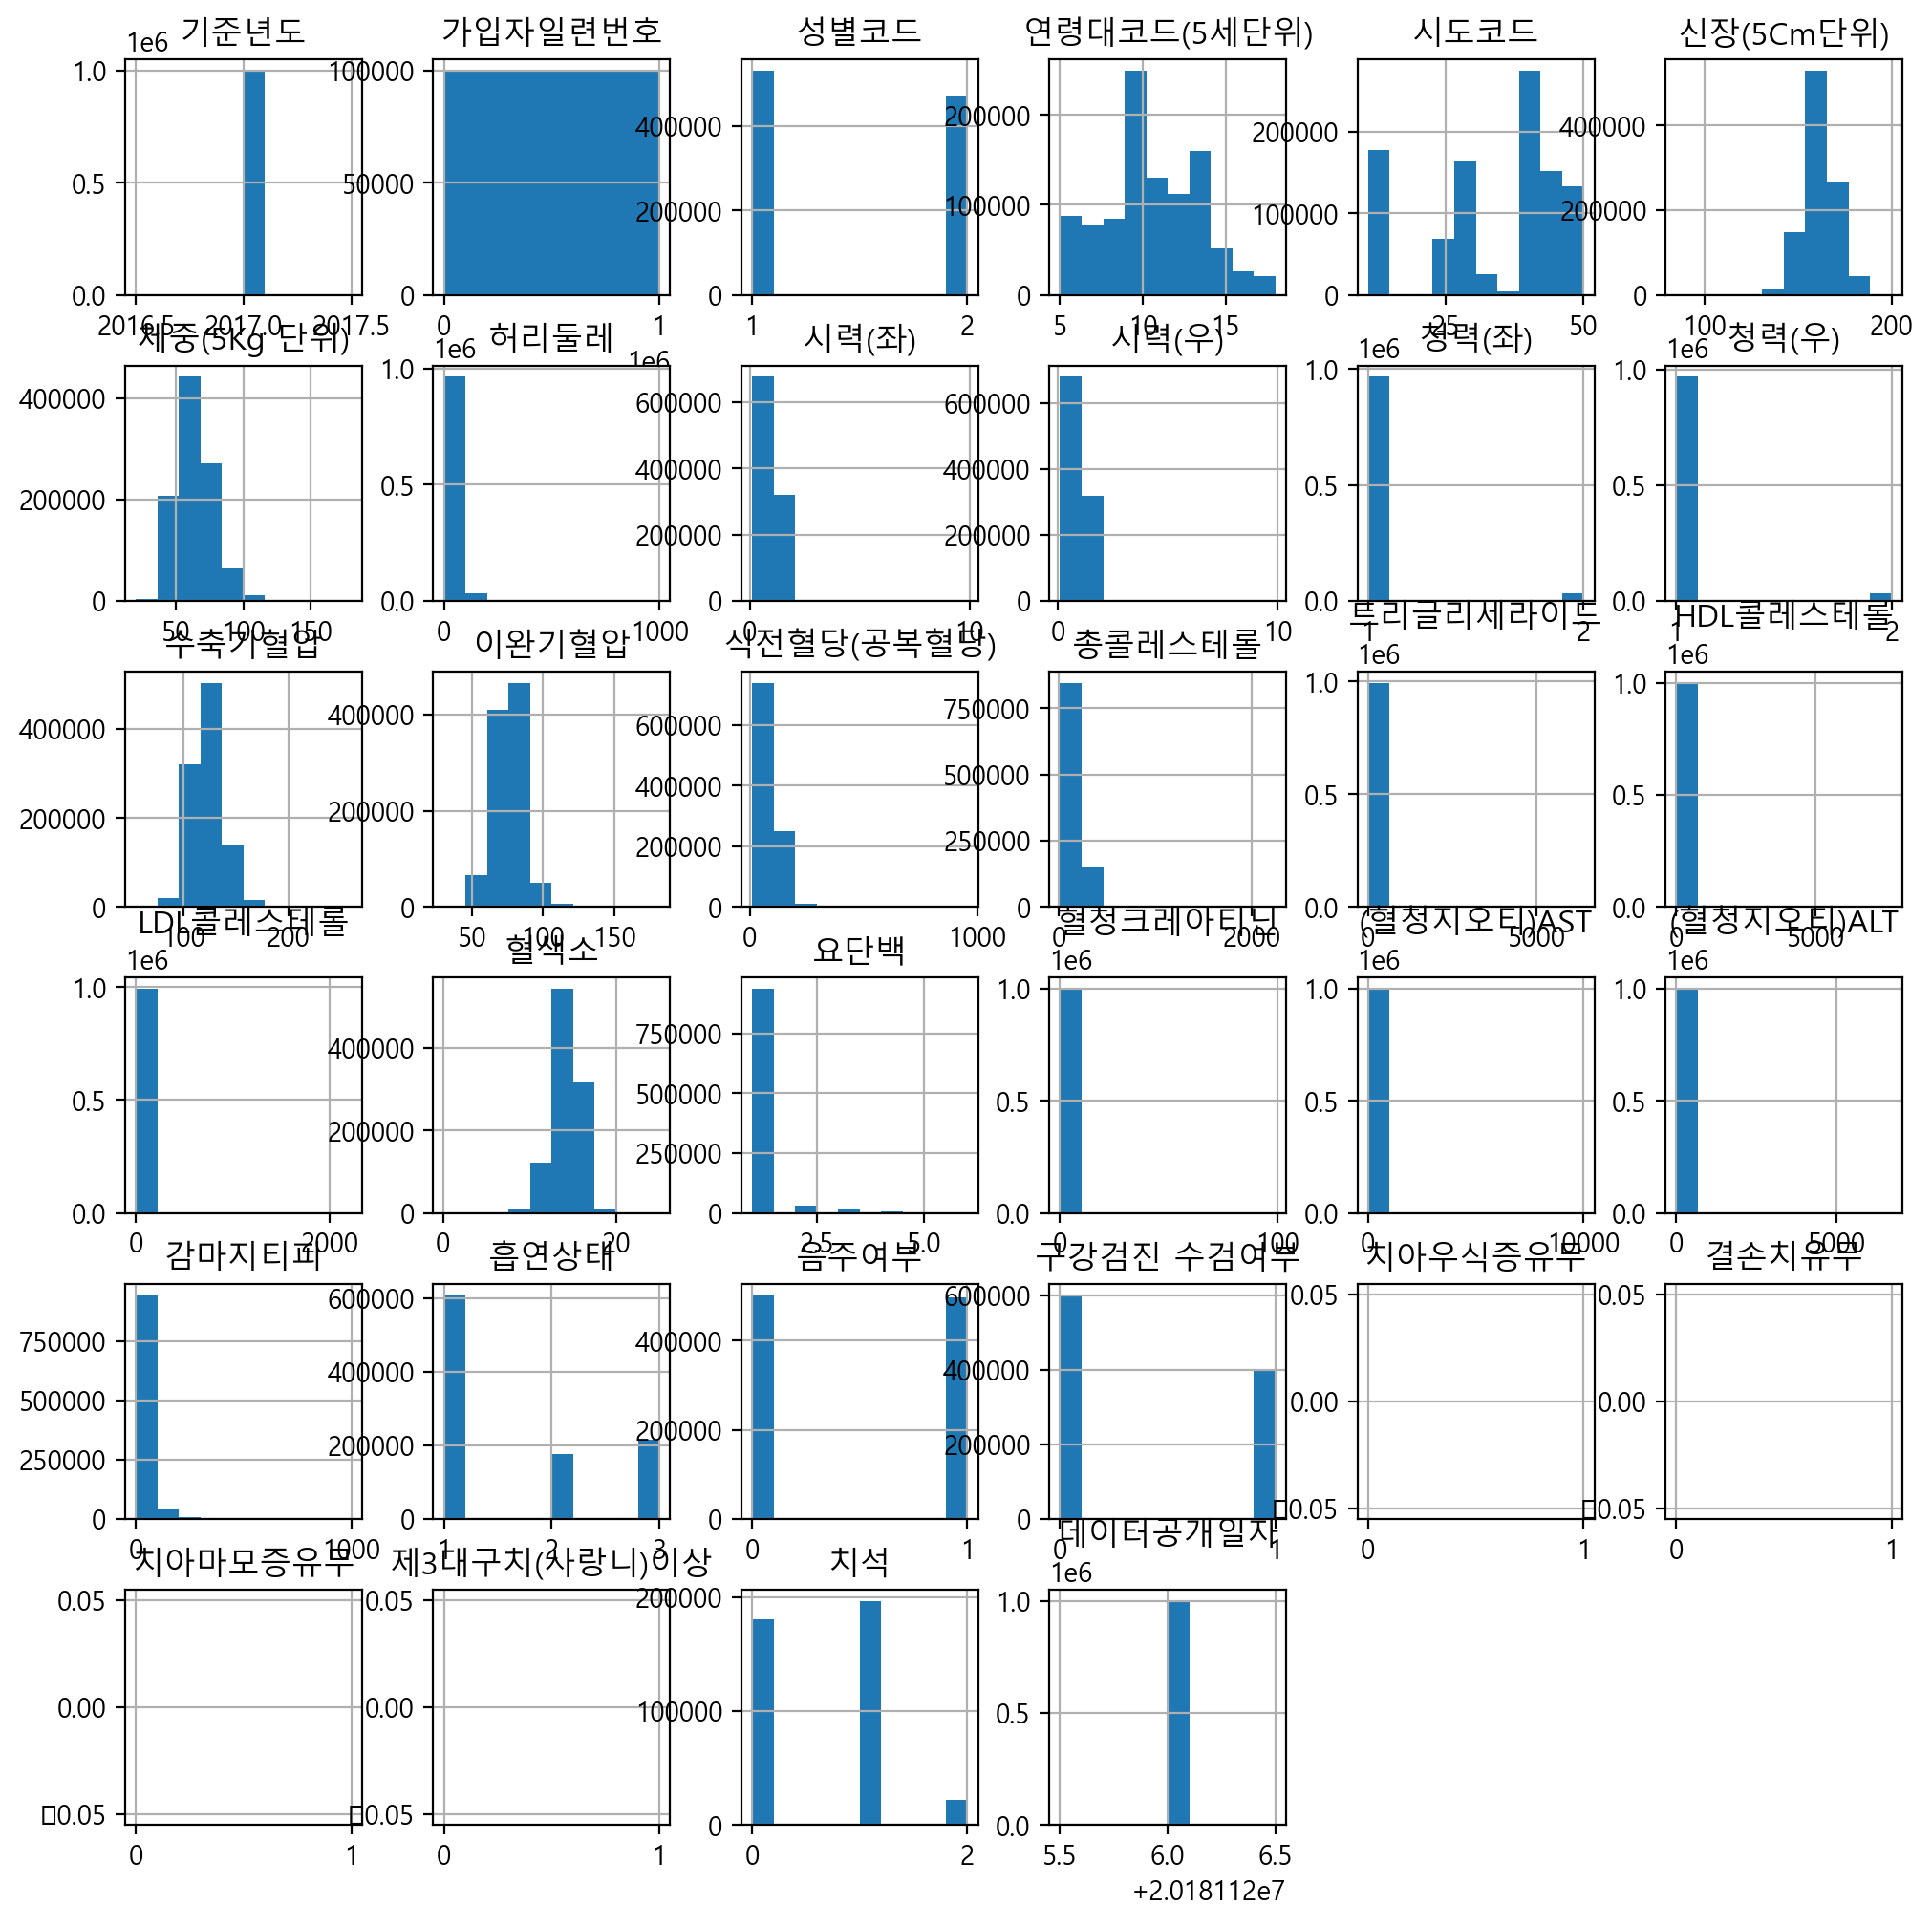

In [52]:
h=df.hist(figsize=(12,12))

array([[<AxesSubplot: title={'center': '기준년도'}>,
        <AxesSubplot: title={'center': '가입자일련번호'}>,
        <AxesSubplot: title={'center': '성별코드'}>],
       [<AxesSubplot: title={'center': '연령대코드(5세단위)'}>,
        <AxesSubplot: title={'center': '시도코드'}>,
        <AxesSubplot: title={'center': '신장(5Cm단위)'}>],
       [<AxesSubplot: title={'center': '체중(5Kg 단위)'}>,
        <AxesSubplot: title={'center': '허리둘레'}>,
        <AxesSubplot: title={'center': '시력(좌)'}>],
       [<AxesSubplot: title={'center': '시력(우)'}>,
        <AxesSubplot: title={'center': '청력(좌)'}>,
        <AxesSubplot: title={'center': '청력(우)'}>]], dtype=object)

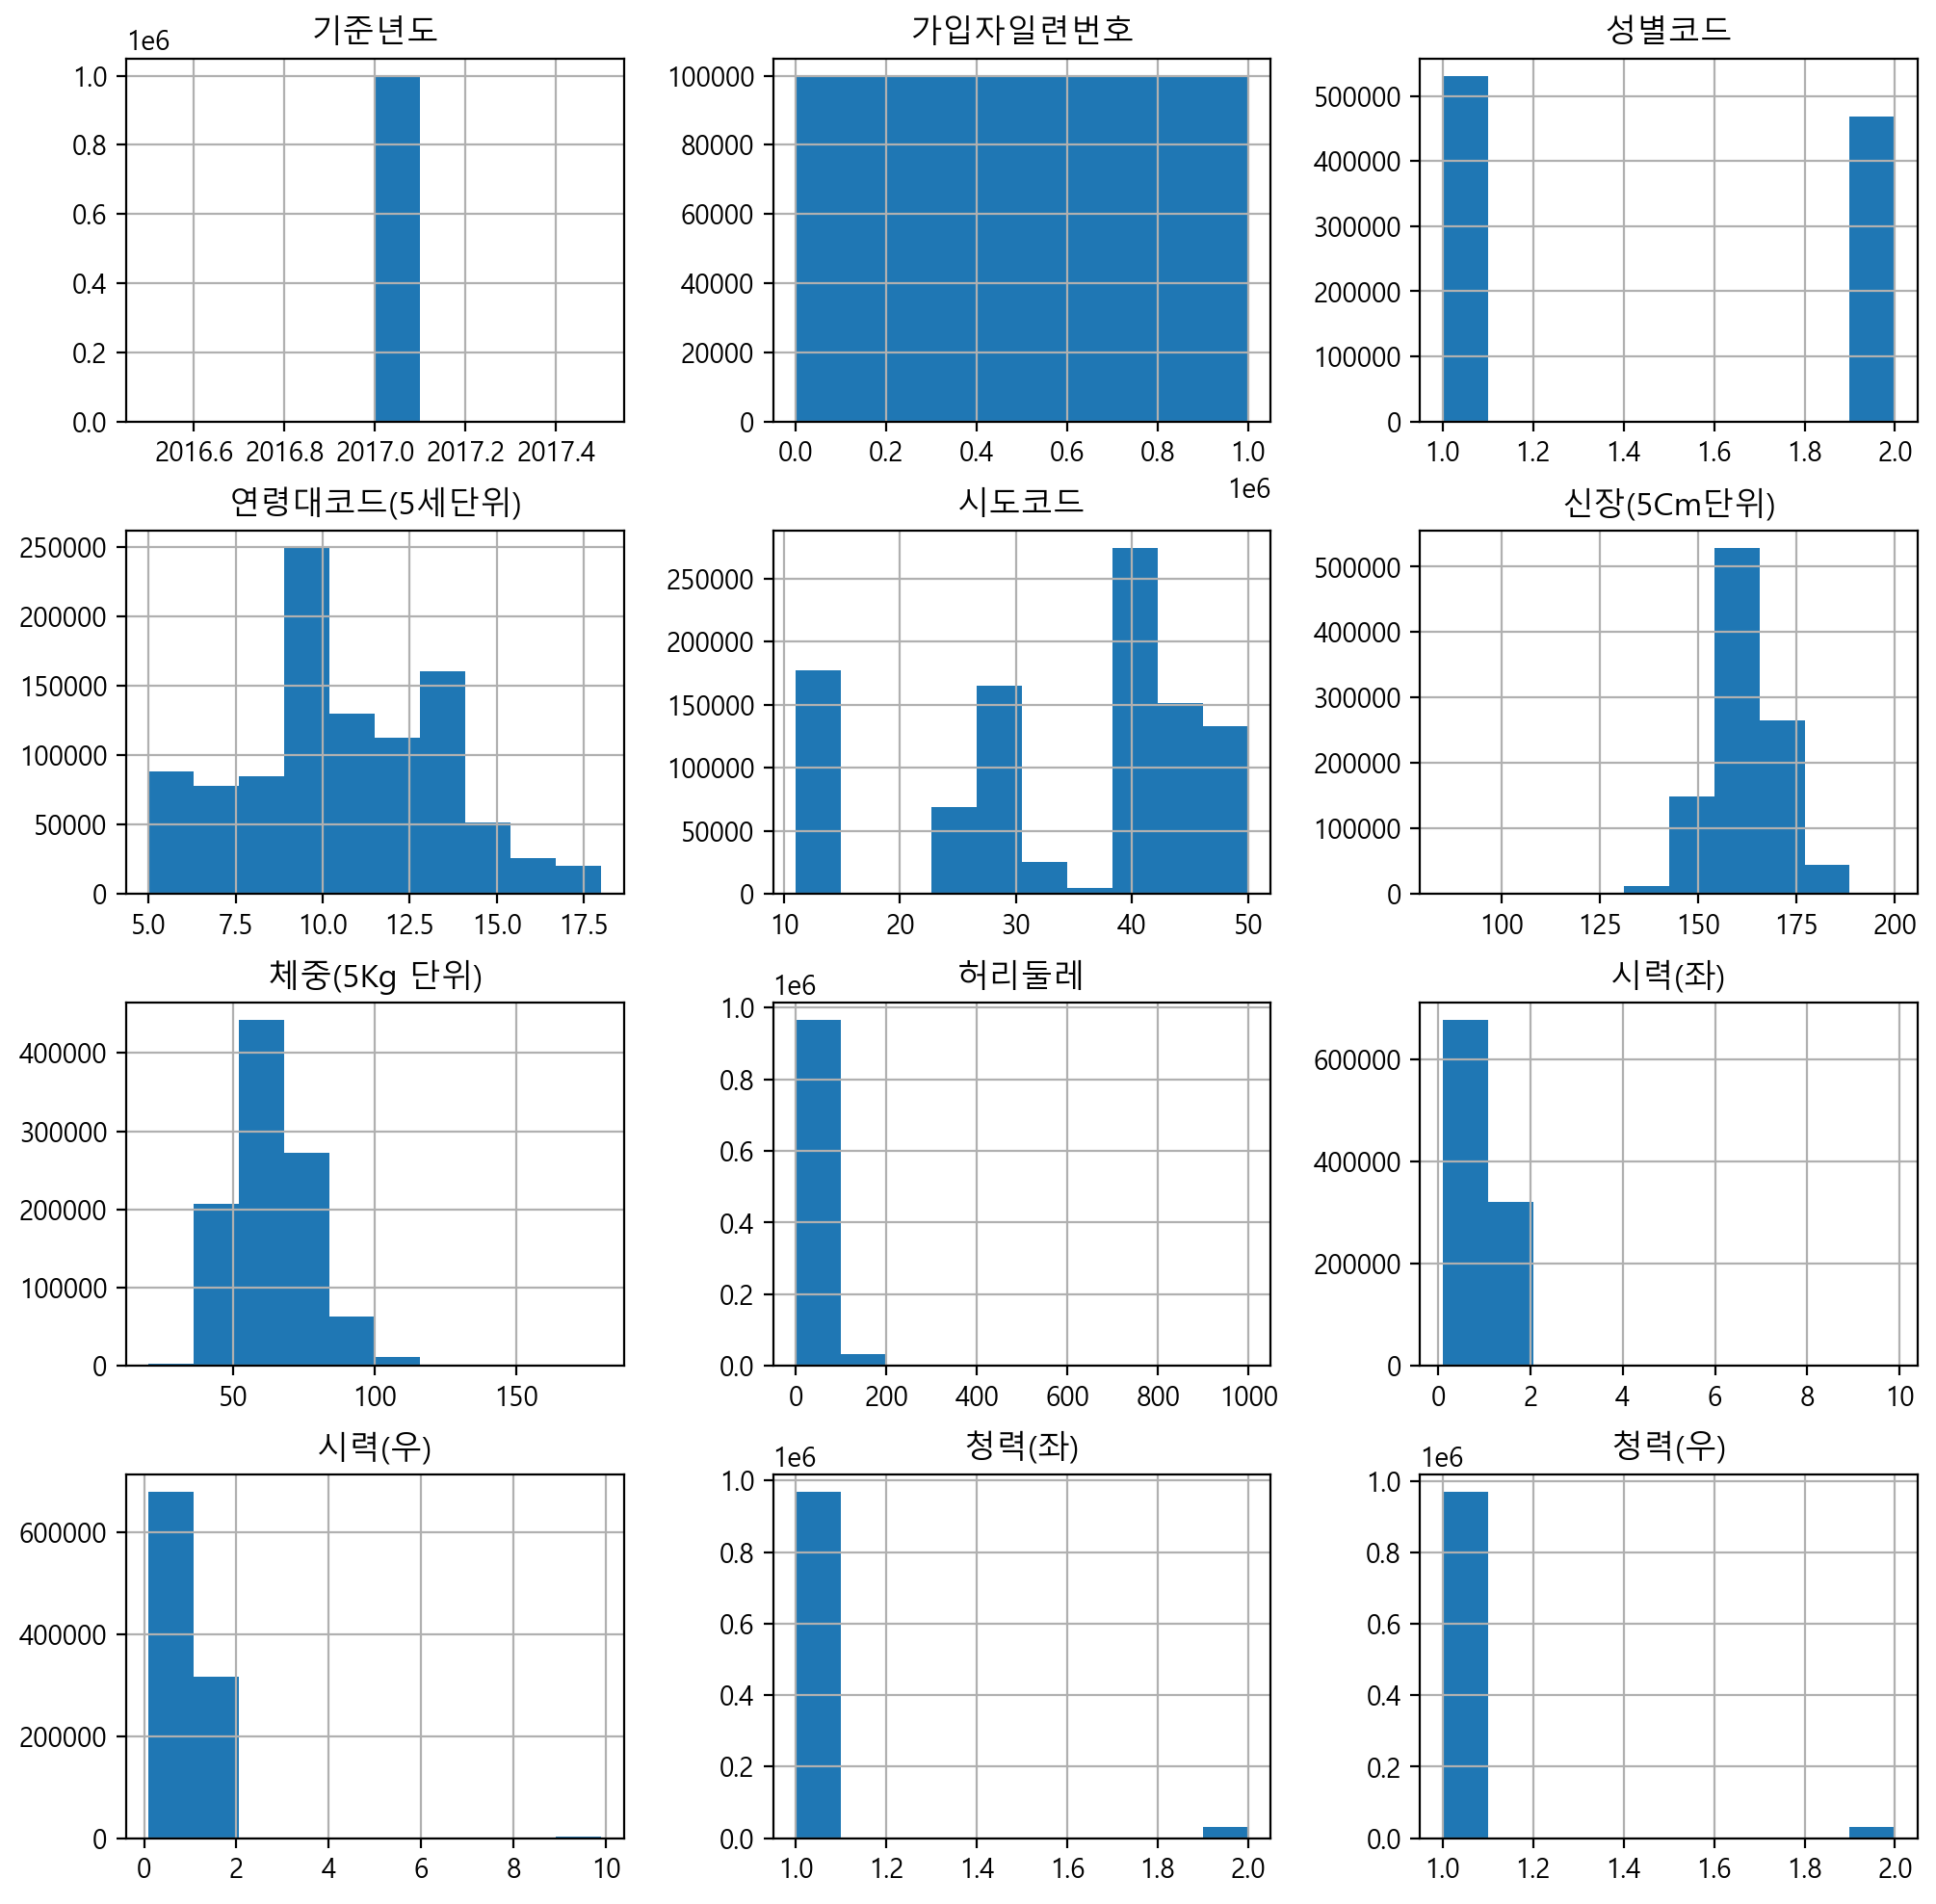

In [53]:
#슬라이싱을 사용해 히스토그램 그리기
#iloc을 활용하면 인덱스의 순서대로 슬라이싱이 가능하다.
#iloc[행,열]순으로 인덱스 쓰면 해당 인덱스만 불러옴.
#전체데이터를 가져올때는 [:,:]
#슬라이싱해주는 대괄호 안의 콜론 앞뒤에 숫자를 쓰면 시작인덱스:끝나는인덱스(+1)지정

df.iloc[:,:12].hist(figsize=(12,12))

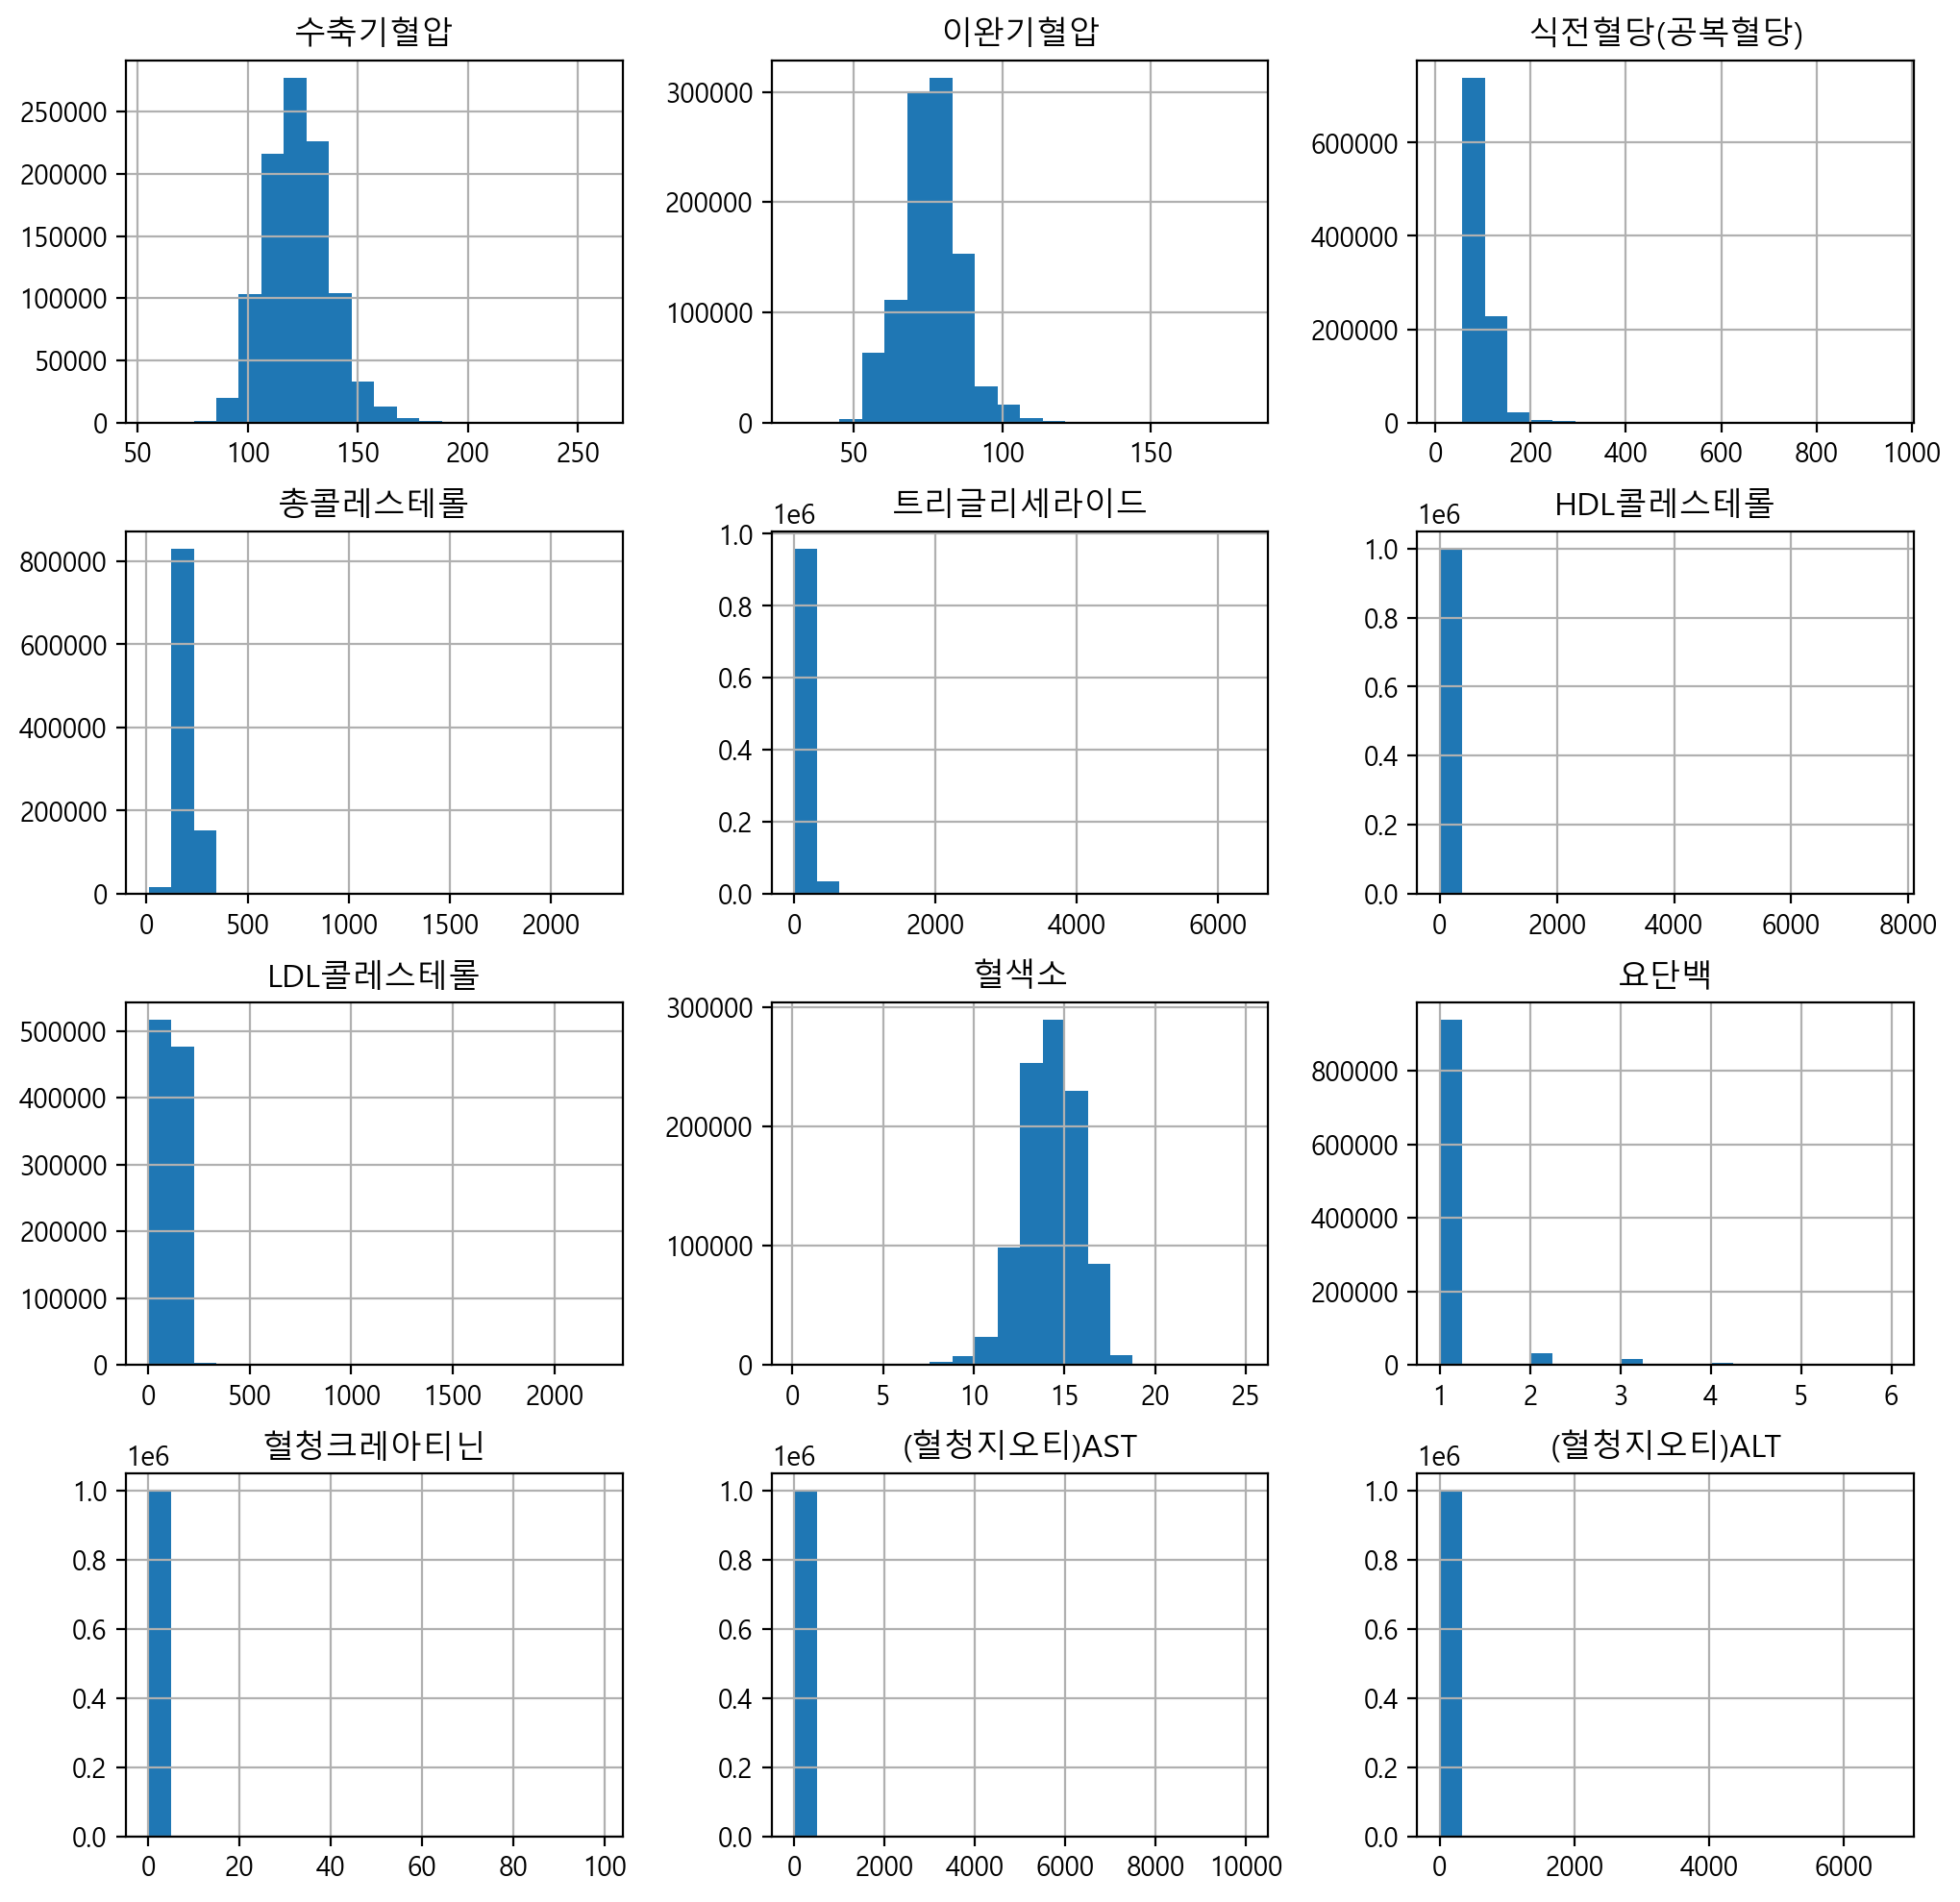

In [56]:
#슬라이싱을 이용해서 12번~23번째까지 히스토그램을 그려보자
#bins를 쓰면 잘게 쪼개짐.
t=df.iloc[:,12:24].hist(figsize=(12,12),bins=20)